In [5]:
import keras.models
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import load_model

from matplotlib import pyplot as plt

from keras.initializers import GlorotUniform, HeUniform

In [2]:
# Устанавливаем seed для повторяемости результатов
numpy.random.seed(42)

# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000,)

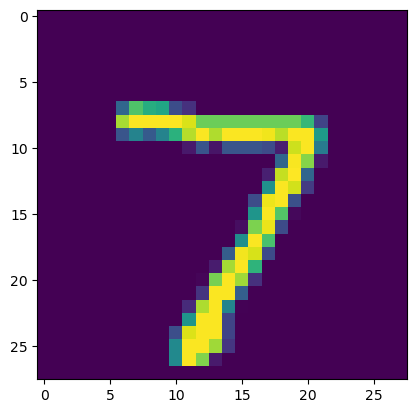

In [3]:
from matplotlib import pyplot as plt

plt.imshow(X_test[0])
y_train.shape

In [4]:
# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [6]:
initializer = GlorotUniform()

# Создаем последовательную модель
model = Sequential()

# Добавляем уровни сети
model.add(Dense(800, input_dim=784, activation="relu", kernel_initializer=initializer))
model.add(Dense(1000, activation="relu", kernel_initializer=initializer))
model.add(Dense(10, activation="softmax", kernel_initializer=initializer))

# Компилируем модель
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

/home/alexennk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │       801,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,439,010 (5.49 MB)

 Trainable params: 1,439,010 (5.49 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:

initializer = HeUniform()

# Создаем последовательную модель
model1 = Sequential()

# Добавляем уровни сети
model1.add(Dense(800, input_dim=784, activation="relu", kernel_initializer=initializer))
model1.add(Dense(1000, activation="relu", kernel_initializer=initializer))
model1.add(Dense(10, activation="softmax", kernel_initializer=initializer))

# Компилируем модель
model1.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model1.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │       801,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,439,010 (5.49 MB)

 Trainable params: 1,439,010 (5.49 MB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
model1.fit(X_train, Y_train, batch_size=32, epochs=3, validation_split=0.2, verbose=2, shuffle=0)

Epoch 1/3
1500/1500 - 9s - 6ms/step - accuracy: 0.8740 - loss: 0.4960 - val_accuracy: 0.9202 - val_loss: 0.2872
Epoch 2/3
1500/1500 - 7s - 5ms/step - accuracy: 0.9287 - loss: 0.2533 - val_accuracy: 0.9386 - val_loss: 0.2252
Epoch 3/3
1500/1500 - 7s - 5ms/step - accuracy: 0.9430 - loss: 0.2044 - val_accuracy: 0.9479 - val_loss: 0.1921


In [20]:
# Оцениваем качество обучения сети на тестовых данных
scores = model1.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 94.63%


In [7]:
# Обучаем сеть
model.fit(X_train, Y_train, batch_size=32, epochs=3, validation_split=0.2, verbose=2, shuffle=0)

Epoch 1/3
1500/1500 - 9s - 6ms/step - accuracy: 0.8560 - loss: 0.6106 - val_accuracy: 0.9104 - val_loss: 0.3215
Epoch 2/3
1500/1500 - 7s - 5ms/step - accuracy: 0.9183 - loss: 0.2907 - val_accuracy: 0.9290 - val_loss: 0.2550
Epoch 3/3
1500/1500 - 7s - 5ms/step - accuracy: 0.9320 - loss: 0.2388 - val_accuracy: 0.9399 - val_loss: 0.2183


In [8]:
# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 93.85%


In [55]:
# Генерируем описание модели в формате json
model_json = model.to_json()
# Записываем модель в файл
json_file = open("mnist_model.json", "w")
json_file.write(model_json)
json_file.close()

model.save_weights("mnist_model.weights.h5")

print ("Сохранили Model")

Сохранили Model


In [77]:
model.save('./models/base.keras')

In [78]:
model = keras.models.load_model('./models/base.keras')

In [14]:
img = plt.imread("./8.png")
img = img[:, :, 1]

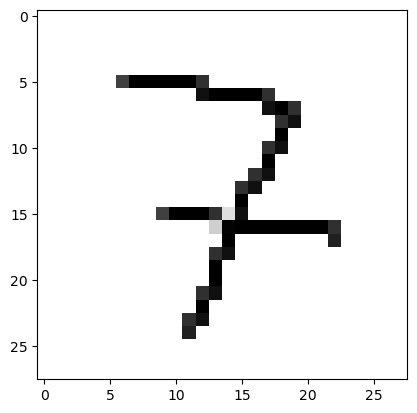

In [15]:
plt.imshow(img, cmap='gray')

In [16]:
img = numpy.array(img.reshape(1, 784))
img

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [17]:
model.predict(1 - img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.00218737, 0.01862695, 0.35527965, 0.35480216, 0.0561402 ,
        0.01318982, 0.00480702, 0.11456122, 0.0220133 , 0.05839232]],
      dtype=float32)

In [18]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

2024-04-05 14:39:16.405741: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


Точность работы на тестовых данных: 97.51%


In [57]:
from keras.models import model_from_json

json_file = open("mnist_model.json", "r")

loaded_model_json = json_file.read()

json_file.close()

# Создаем модель на основе загруженных данных

loaded_model = model_from_json(loaded_model_json)

# Загружаем веса в модель

loaded_model.load_weights("mnist_model.weights.h5")



# Компилируем модель

loaded_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [80]:
loaded_model.predict(X_test[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[4.2352090e-06, 2.1683285e-07, 1.7619228e-05, 5.6886656e-04,
        1.3120397e-09, 1.0624285e-06, 2.5985320e-11, 9.9939370e-01,
        6.8555541e-06, 7.4623786e-06]], dtype=float32)

In [76]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 97.78%
